In [1]:
import plotly.express as px
from scipy import stats
from SiFoN import viz
import pandas as pd
import numpy as np
from SiFoN import smoothing as sm
from SiFoN import clinical_analysis as clin

In [2]:
data = np.load("../../black_supp4/2m.near_tss.background.1000G_EUR.npy")

In [3]:
mean = data.mean(axis = 0)[:40]
std = data.std(axis = 0)[:40]

In [4]:
mean.shape

(40,)

In [5]:
wid = 400
PTEN_TSS = {
    'RefSeqTSS Promoter': [89623382 - wid, 89623382 + wid],
    'CLEVER FANTOM CAGE Promoter': [89623389 - wid, 89623389 + wid],
    'UCSC genome browser':[89623195 - wid, 89623195 + wid],
    'Sheng PTEN Promoter' : [89622930, 89624219]
}

In [6]:
file = "test_input_data/chr10_89580225_89633389_sequence_class_scores.npy"
vcf = pd.read_csv("test_input_data/chr10_89580225_89633389.vcf", 
                  header=None, sep="\t", 
                  names=["Chromosome", "Position", "SNP", "Ref", "Alt"])

In [7]:
scores_signed = viz.preprocess(file, vcf, signed=True)

In [8]:
scores_norm = (scores_signed - mean)/std

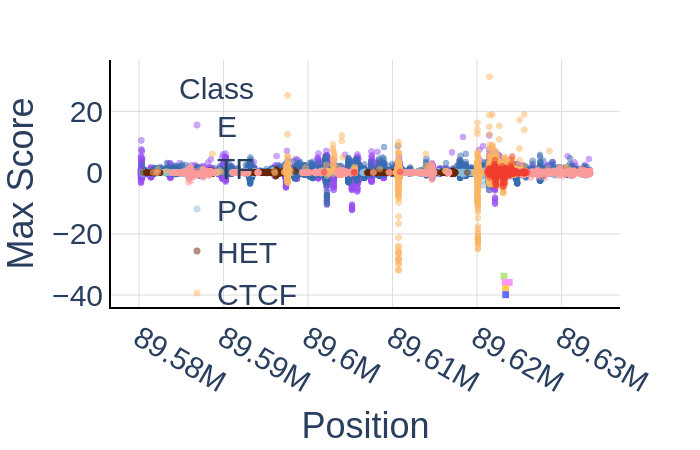

In [9]:
max_scores_signed = viz.find_max(scores_signed, signed=True)
viz.plot_max("test.html", max_scores_signed, TSS=PTEN_TSS, fontsize = 30, pointsize = 7, opacity = 0.5)

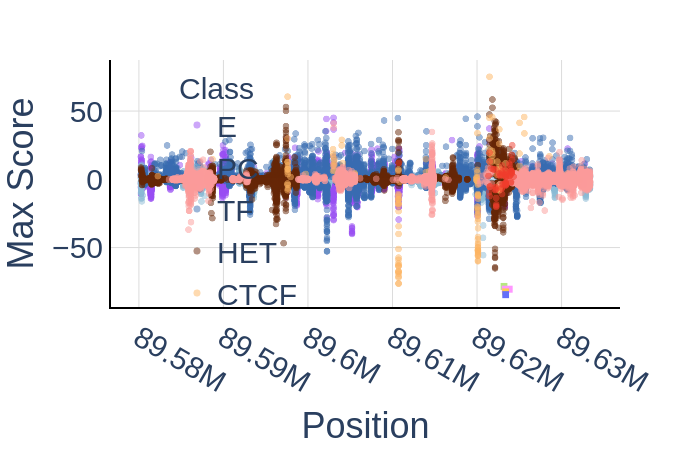

In [12]:
# max_scores_signed = viz.find_max(scores_norm, signed=True)
viz.plot_max("smoothed.html", max_scores_signed, TSS=PTEN_TSS, fontsize = 30, pointsize = 7, opacity = 0.5)

In [ ]:
# smoothed_scores = sm.smooth_all_scores(scores_norm)
# max_scores_signed = viz.find_max(smoothed_scores, signed=True)
# viz.plot_max("noramlized_PTEN_smooth.html", max_scores_signed, TSS=PTEN_TSS,  pointsize = 7, opacity = 0.5)

In [ ]:
row_labels = pd.read_csv("test_input_data/PTEN_row_labels", header=0) # Description of SNPs
scores = pd.read_csv("test_input_data/PTEN_sequence_class_scores.npy") # Sequence class scores
## new code
scores = (scores - mean)/std
## new code
dis_score = pd.read_csv("test_input_data/PTEN_DIS.csv") # Disease impact score
scores["Disease Impact Score"] = dis_score["Disease Impact Score"]
scores["Alteration"] = row_labels["Alteration"]
clinical_data = pd.read_csv("test_input_data/PTEN_Brown_Suppl4.csv")
scores = clinical_data.merge(scores) # Clinical data connects to the Sei results by the `Alteration` column.
scores.head()

In [ ]:
clin.odds_ratio(df=scores, control_col="Control Alleles", case_col = "Breast Cancer Case Alleles",
               num_cases = 52065, num_controls = 28549, correction = 0.1)
clin.add_case_control_label(df=scores, case_cuttoff = 1.5, control_cutoff = 0.5)
scores.head(1) # see the last two columns

In [ ]:
scores = pd.read_csv("test_input_data/PTEN_sequence_class_scores.npy")
scores = (scores - mean)/std
max_scores = viz.find_max(scores, signed=True).drop(columns="index")
max_scores["Disease Impact Score"] = dis_score["Disease Impact Score"]
max_scores["Alteration"] = row_labels["Alteration"]
max_scores = clinical_data.merge(max_scores)
clin.odds_ratio(df=max_scores, control_col="Control Alleles", case_col = "Breast Cancer Case Alleles",
               num_cases = 52065, num_controls = 28549, correction = 0.1)
clin.add_case_control_label(df=max_scores, case_cuttoff = 1.5, control_cutoff = 0.5)
max_scores.head(1)

In [ ]:
max_scores["Position on chrom10"] = row_labels["pos"]

fig = px.scatter(max_scores, x="Position on chrom10", y="Disease Impact Score", color="Class", 
                 color_discrete_sequence = max_scores["Color"].unique(), hover_data=max_scores.columns)
viz.white_bg(fig)
fig.update_traces(marker={'size': 12})
fig.update_layout(font=dict(size=18))
fig.write_html("DIS_v_pos.html")
fig.show()

In [ ]:
fig = px.scatter(max_scores, x="Position on chrom10", y="Max Score", color="Class", 
                 color_discrete_sequence = max_scores["Color"].unique(), hover_data=max_scores.columns)
viz.white_bg(fig)
fig.update_traces(marker={'size': 8})
fig.update_layout(font=dict(size=18))
fig.write_html("max_v_pos.html")
fig.show()